# KADD

# Wykład 2

### Szukanie kwantyla

Mamy sobie rozkład prawdopodobieństwa, załóżmy na ten przykład,

$f(x) = \exp{(-x)}$, $x \in (0, \infty)$

Dystrybuantę z tego łatwo policzyć,

$F(x) = 1-\exp{(-x)}$

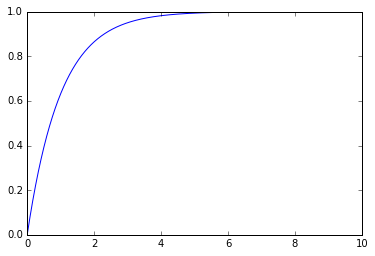

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def f(x):
    return np.exp(-x)

def F(x):
    return 1-np.exp(-x)

#tablica x do narysowania dystrybuanty

x = np.linspace(0, 10, 10000)
y = F(x) #też tablica
plt.plot(x, y)


No to jak w tym znaleźć kwantyl. Załóżmy że szukamy kwantyla rzędu $r=0.5$ (to jest efektywnie mediana). Czyli efektywnie musimy znaleźć pierwiastek równania $y(x) = F(x)-r$. Dla takich porządnych monotonicznych funkcji jest na to prosty trik:

(0.69306930693069302, 0.49996106166925902)

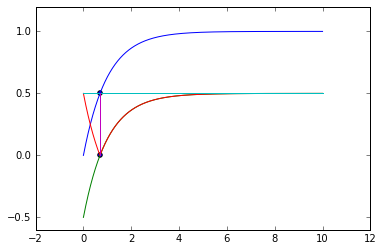

In [4]:
r = 0.5
plt.plot(x,y) #wykres funkcji
plt.plot(x,y-r) #wykres funkcji przesuniętej w dół o r, tu: zielony
plt.plot(x,np.abs(y-r)) #wykres modułu funkcji przesuniętej w dół o r, tu: czerwony
                        #MYK: dystrybuanta była monotoniczna (dystrybuanty generalnie zawsze są),
                        #więc to co narysowaliśmy ma tylko jedno łatwo identyfikowalne minimum takie że
                        #F(x_min) = r, a abs(F(x_min)-r) = 0 - więc nasze x_min to nasz kwantyl
plt.plot((0,10),(0.5,0.5))
index_minimum = np.argmin(np.abs(y-r))
x_min, y_min = x[index_minimum], y[index_minimum]
plt.plot((x[index_minimum],x[index_minimum]),(0,0.5)) #jak sie robi strzalki
plt.scatter(x_min,y_min)
plt.scatter(x_min,y_min-r)
x_min, y_min

In [5]:
def find_kwantyl(r, x, y):
    """
    r: rząd kwantyla
    x: tablica x
    y: tablica y wartości dystrybuanty dla powyższej tablicy x
    
    zwraca: kwantyl w sensie takie x dla którego dystrybuanta funkcji F wynosi r PRZY ZAŁOŻENIU że F jest monotoniczna
    """
    index_minimum = np.argmin(np.abs(y-r))
    return x[index_minimum]

find_kwantyl(0.5, x, y)

0.69306930693069302

Dla przypadku gdzie gęstość prawdopodobieństwa wynosi $\cosh(x)^{-2}$:

(0.54905490549054903, 0.49981154719800369)

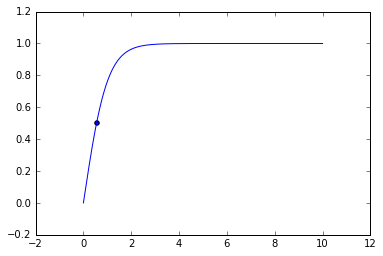

In [9]:
def f2(x):
    return np.cosh(x)**-2

def F2(x):
    return np.tanh(x)

Y2 = F2(x) #nowa tablica dystrybuant
plt.plot(x, Y2)

x_kwantyl2 = find_kwantyl(0.5, x, Y2)
y_kwantyl2 = F2(x_kwantyl2)
plt.scatter(x_kwantyl2, y_kwantyl2)
x_kwantyl2, y_kwantyl2

# KADD3 2016.03.11

## Random walk zwraca skorelowane wyniki?!

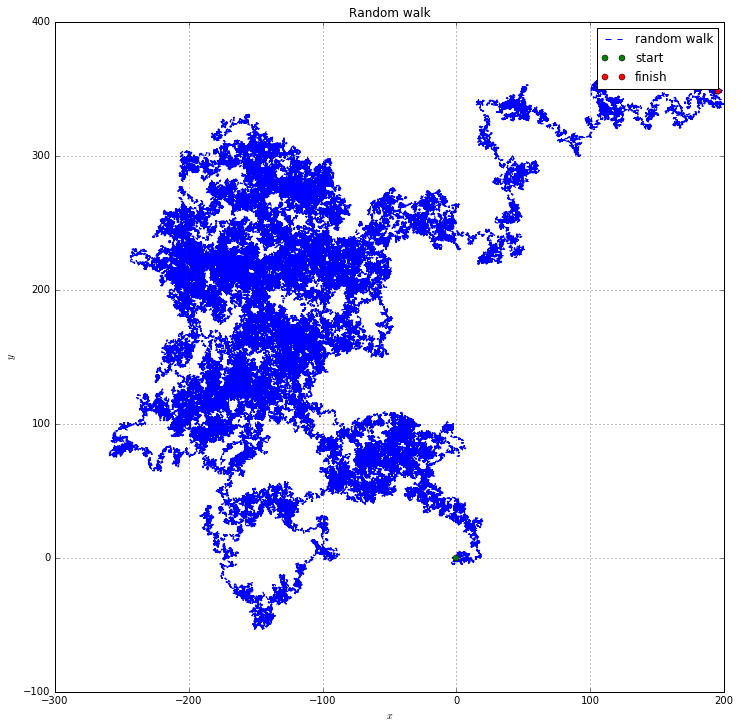

No chyba zwraca. Kowariancja wynosi 845.914682764982.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000000
r = np.zeros((N,2))

for i in range(1,N):
    r[i] = r[i-1] + np.random.random(2) - 0.5
   
x, y = r[:,0], r[:,1]

fig, axes = plt.subplots(figsize=(12,12))
axes.plot(x,y, "b--", label="random walk")
axes.plot(x[0], y[0], "go", label="start")
axes.plot(x[-1], y[-1], "ro", label="finish")
axes.grid()
axes.set_title("Random walk")
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
plt.legend()
plt.show()

Exy = np.mean(x*y)
Ex = np.mean(x)
Ey = np.mean(y)
Covariance = Exy - Ex*Ey
Pearson = Covariance/(np.std(x)*np.std(y))
print("No chyba zwraca. Kowariancja wynosi {}.".format(Covariance))

Więcej do poczytania: http://stats.stackexchange.com/questions/99796/how-can-i-show-that-a-random-walk-is-not-covariance-stationary kowariancja rośnie liniowo z czasem.

### Random Walk 2.0

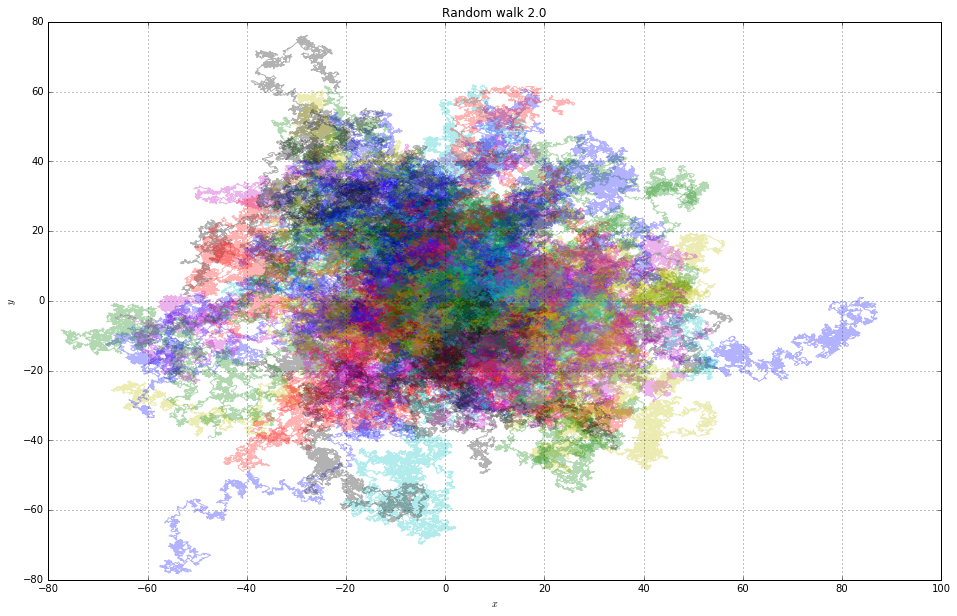

In [11]:
import numpy as np
Ncząstek = 100
N = 10000

r = np.random.random((Ncząstek, 2))
r_array = np.empty((Ncząstek, 2, N))
for i in range(N):
    r_array[:,:,i] = r
    r += np.random.random(r.shape) - 0.5  
    
fig, axes = plt.subplots(figsize=(16,10))
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.set_title("Random walk 2.0")
axes.grid()
for i in range(Ncząstek):
    x = r_array[i,0,:]
    y = r_array[i,1,:]
    axes.plot(x,y, alpha=0.3)